# Regression, seaborn

Correlation and Regression as well as a quick exploration of the seaborn visualization capabilities

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
#!pip install gapminder
#from gapminder import gapminder

In [ ]:
#new library
import statsmodels.api as sm
import statsmodels.formula.api as smf

[kaggle Housing Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 

In [ ]:
#or
url ="https://drive.google.com/file/d/1hzvcubf2B8PKtjG4OAcytQKwOlESkBvW/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Seaborn Graphs

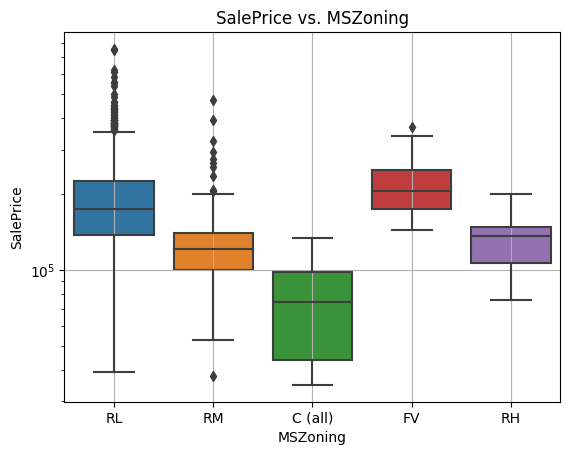

In [ ]:
sns.boxplot(df, y = "SalePrice", x = "MSZoning");
plt.yscale("log");plt.grid();
plt.title("SalePrice vs. MSZoning");

#### Multiple Groups

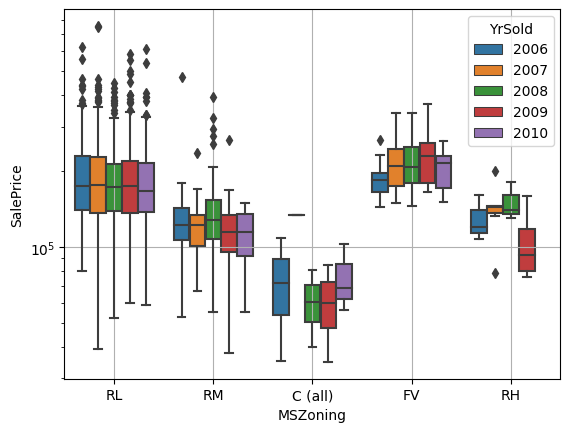

In [ ]:
sns.boxplot(df, y = "SalePrice", x = "MSZoning", hue = "YrSold");
plt.yscale("log");
plt.grid();
plt.title("SalePrice vs. MSZoning");

## Violin Plots

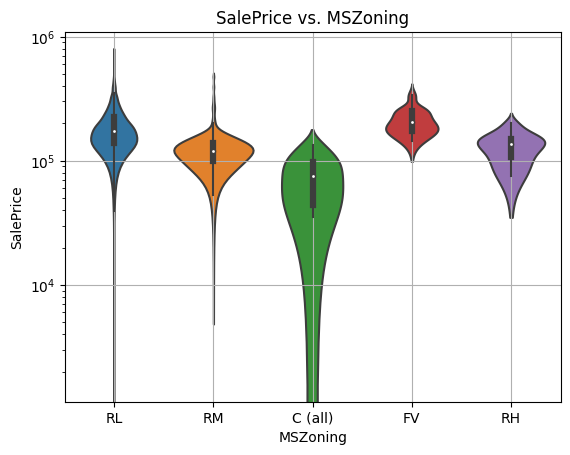

In [ ]:
sns.violinplot(df, y = "SalePrice", x = "MSZoning");
plt.yscale("log");plt.grid();
plt.title("SalePrice vs. MSZoning");

### Histograms

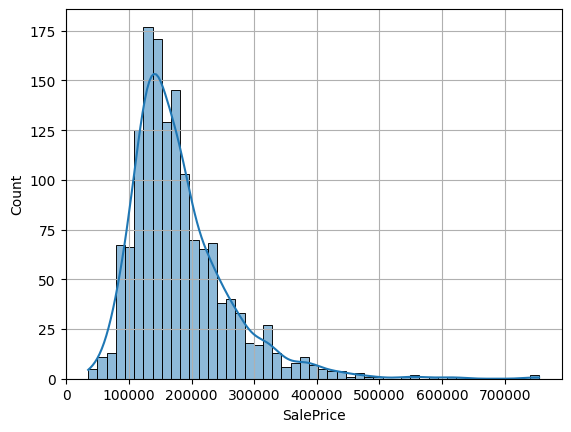

In [ ]:
sns.histplot(data=df, x="SalePrice", kde=True);plt.grid();

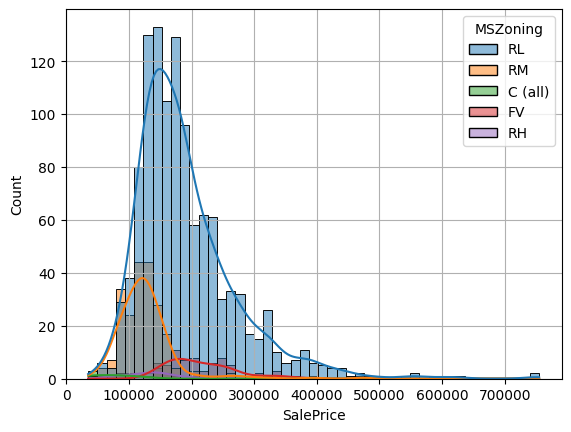

In [ ]:
sns.histplot(data=df, x="SalePrice", kde=True, hue = "MSZoning");plt.grid();


### Tasks:

#### Regression/Correlation (Housing Data)

1. Look up the `pairplot` function and create pairwise scatter plots of 
  * 5-7 hand-picked numerical features, one of them being `SalePrice`
  * Hint: look at `dtypes`
2. Choose the row with `SalePrice` and pick two reasonably strong correlations.
  * Compute the correlation coefficients
  * Fit a simple regression line (with `statsmodels`) for each and visualize them using `regplot`
  * Fit a **multiple regression** by including both *explanatory variables* and compare the coefficients



In [ ]:
df.dtypes != "object"

Id                True
MSSubClass        True
MSZoning         False
LotFrontage       True
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

In [ ]:
df.columns[df.dtypes != "object"][1:]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Extra Credit

#### Modeling Missing Values Titanic Data

1. detect the missing values 
2. replace the NAs in survived with the  estimate grouped by sex

In [ ]:
#titanic
titanic = sns. load_dataset('titanic')
titanic["3rdClass"] = titanic["pclass"]==3
titanic["male"] = titanic["sex"]=="male"
#titanic.head()

#Introduce some missing values
rng = default_rng()

missingRows = rng.integers(0,890,20)
print(missingRows)
#introduce missing values
titanic.iloc[missingRows] = np.nan